# 🚜 Predicting the Sale Price of Bulldozers using Machine learning

In this notebook, we're goiing to go through a machine learning project with the goal of predicting the sale price of bulldozers.
## 1.Problem definition
>How well can we predict the future sale price of a bulldozer, given its characteristics and previous examples of how much similar bulldozers have been sold for?

## 2.Data
The data is downloaded from Kaggle Bluebook for Bulldozers competition.
There are three parts:
1. Train.csv is the training set, which contains data through the end of 2011.
2. Valid.csv is the validation set, which contains data from January 1, 2012 - April 30, 2012 You make predictions on this set throughout the majority of the competition. Your score on this set is used to create the public leaderboard.
3. Test.csv is the test set, which won't be released until the last week of the competition. It contains data from May 1, 2012 - November 2012. Your score on the test set determines your final rank for the competition.

## 3.Evaluation
The evaluation metrics for this competition is the RMSLE (root mean squared log error) between the actual and predicted auction prices.

For more on the valuation of this project, check:
https://www.kaggle.com/c/bluebook-for-bulldozers/overview/evaluation

**Note**: The goal for most regression evaluation metrics is to minimize the error. For example, our goal for this project will be to build a machine learning model which minimises RMSLE.
## 4.Features
Kaggle has a data dictionary which is available at:
C:\Users\Hi\Desktop\sample_1\bulldozer-project\data


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

In [103]:
# Import training and validation set
df=pd.read_csv("data/TrainAndValid.csv", low_memory=False)#For removing low memory warning low_memory=False

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   saledate                  412698 non-null  object 
 10  fiModelDesc               412698 non-null  object 
 11  fiBaseModel               412698 non-null  object 
 12  fiSecondaryDesc           271971 non-null  object 
 13  fiModelSeries             58667 non-null   o

In [4]:
df.describe()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter
count,4.126980e+05,412698.000000,4.126980e+05,412698.000000,412698.000000,392562.000000,412698.000000,1.475040e+05
mean,2.011161e+06,31215.181414,1.230061e+06,6947.201828,135.169361,6.585268,1899.049637,3.522988e+03
std,1.080068e+06,23141.743695,4.539533e+05,6280.824982,9.646749,17.158409,292.190243,2.716993e+04
min,1.139246e+06,4750.000000,0.000000e+00,28.000000,121.000000,0.000000,1000.000000,0.000000e+00
25%,1.421898e+06,14500.000000,1.088593e+06,3261.000000,132.000000,1.000000,1985.000000,0.000000e+00
50%,1.645852e+06,24000.000000,1.284397e+06,4605.000000,132.000000,2.000000,1995.000000,0.000000e+00
75%,2.261012e+06,40000.000000,1.478079e+06,8899.000000,136.000000,4.000000,2001.000000,3.209000e+03
max,6.333349e+06,142000.000000,2.486330e+06,37198.000000,173.000000,99.000000,2014.000000,2.483300e+06


In [5]:
df.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

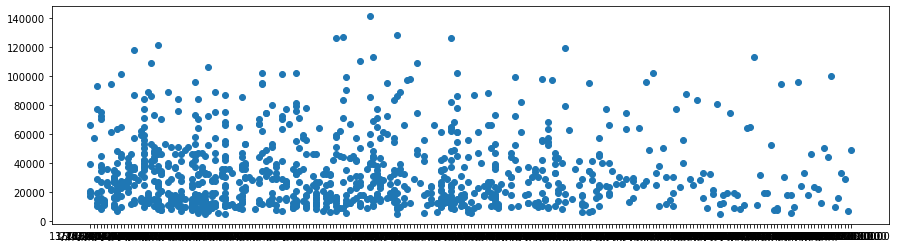

In [6]:
fig, ax=plt.subplots(figsize=(15,4))
ax.scatter(df.saledate[:1000], df.SalePrice[:1000]);

<AxesSubplot:ylabel='Frequency'>

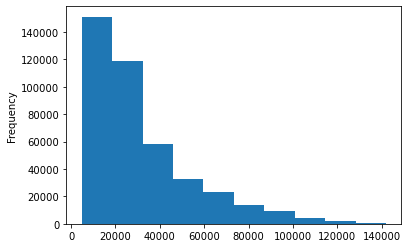

In [7]:
df.SalePrice.plot(kind='hist')

In [8]:
df.saledate[:500]

0      11/16/2006 0:00
1       3/26/2004 0:00
2       2/26/2004 0:00
3       5/19/2011 0:00
4       7/23/2009 0:00
            ...       
495     10/4/2007 0:00
496     8/13/2009 0:00
497      8/5/2010 0:00
498      6/2/2011 0:00
499     5/19/2011 0:00
Name: saledate, Length: 500, dtype: object

### Parsing date

When we work with time series data, we want to enrich the time and date component as much as possible.

We can do that by telling pandas which of our columns has dates in it using the *parse_dates* parameter.

In [9]:
# Import data again but this time parse date
df=pd.read_csv("data/TrainAndValid.csv", low_memory=False,
              parse_dates=["saledate"])

In [10]:
df.saledate.dtype

dtype('<M8[ns]')

In [11]:
df.saledate[:500]

0     2006-11-16
1     2004-03-26
2     2004-02-26
3     2011-05-19
4     2009-07-23
         ...    
495   2007-10-04
496   2009-08-13
497   2010-08-05
498   2011-06-02
499   2011-05-19
Name: saledate, Length: 500, dtype: datetime64[ns]

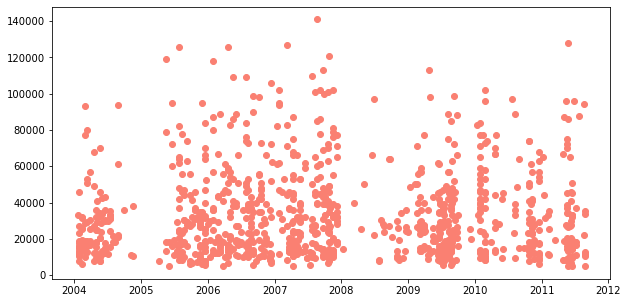

In [12]:
fig, ax=plt.subplots(figsize=(10,5))
ax.scatter(df.saledate[:1000], df.SalePrice[:1000], color='salmon');

In [13]:
df.T.head(20)

,0,1,2,3,4,5,6,7,8,9,...,412688,412689,412690,412691,412692,412693,412694,412695,412696,412697
SalesID,1139246,1139248,1139249,1139251,1139253,1139255,1139256,1139261,1139272,1139275,...,6333305,6333314,6333330,6333339,6333343,6333344,6333345,6333347,6333348,6333349
SalePrice,66000.0,57000.0,10000.0,38500.0,11000.0,26500.0,21000.0,27000.0,21500.0,65000.0,...,11500.0,13000.0,20500.0,13000.0,10000.0,10000.0,10500.0,12500.0,10000.0,13000.0
MachineID,999089,117657,434808,1026470,1057373,1001274,772701,902002,1036251,1016474,...,1800259,1908162,1879923,1856845,1799614,1919201,1882122,1944213,1794518,1944743
ModelID,3157,77,7009,332,17311,4605,1937,3539,36003,3883,...,21437,21437,21446,21435,21435,21435,21436,21435,21435,21436
datasource,121,121,121,121,121,121,121,121,121,121,...,149,149,149,149,149,149,149,149,149,149
auctioneerID,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,...,1.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0
YearMade,2004,1996,2001,2001,2007,2004,1993,2001,2008,1000,...,2006,2006,2006,2005,2005,2005,2005,2005,2006,2006
MachineHoursCurrentMeter,68.0,4640.0,2838.0,3486.0,722.0,508.0,11540.0,4883.0,302.0,20700.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
UsageBand,Low,Low,High,High,Medium,Low,High,High,Low,Medium,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
saledate,2006-11-16 00:00:00,2004-03-26 00:00:00,2004-02-26 00:00:00,2011-05-19 00:00:00,2009-07-23 00:00:00,2008-12-18 00:00:00,2004-08-26 00:00:00,2005-11-17 00:00:00,2009-08-27 00:00:00,2007-08-09 00:00:00,...,2012-02-13 00:00:00,2012-01-28 00:00:00,2012-01-28 00:00:00,2012-01-28 00:00:00,2012-02-13 00:00:00,2012-03-07 00:00:00,2012-01-28 00:00:00,2012-01-28 00:00:00,2012-03-07 00:00:00,2012-01-28 00:00:00


### Sort DataFrame by saledate

When worling with time series data, it's a good idea to sort it by date.

In [14]:
# Sort DataFrame in date order
df.sort_values(by=["saledate"], inplace=True, ascending=True)
df.saledate.head(20)

205615   1989-01-17
274835   1989-01-31
141296   1989-01-31
212552   1989-01-31
62755    1989-01-31
54653    1989-01-31
81383    1989-01-31
204924   1989-01-31
135376   1989-01-31
113390   1989-01-31
113394   1989-01-31
116419   1989-01-31
32138    1989-01-31
127610   1989-01-31
76171    1989-01-31
127000   1989-01-31
128130   1989-01-31
127626   1989-01-31
55455    1989-01-31
55454    1989-01-31
Name: saledate, dtype: datetime64[ns]

### Make a copy of the original DataFrame
We make a copy of the original dataframe so when we manipulate the  copy, we've still got our original data.

In [15]:
# Make a copy
df_tmp = df.copy()

## Add datetime parameters for saledate column

In [16]:
df_tmp["saleYear"] = df_tmp.saledate.dt.year
df_tmp["saleMonth"] =df_tmp.saledate.dt.month
df_tmp["saleDay"] = df_tmp.saledate.dt.day
df_tmp["saleDayOfweek"] = df_tmp.saledate.dt.dayofweek
df_tmp["saleDayOfYear"] = df_tmp.saledate.dt.dayofyear

In [17]:
df_tmp.head(25)

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,saleYear,saleMonth,saleDay,saleDayOfweek,saleDayOfYear
205615,1646770,9500.0,1126363,8434,132,18.0,1974,NaN,NaN,1989-01-17,...,None or Unspecified,Straight,None or Unspecified,NaN,NaN,1989,1,17,1,17
274835,1821514,14000.0,1194089,10150,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,Standard,Conventional,1989,1,31,1,31
141296,1505138,50000.0,1473654,4139,132,99.0,1978,NaN,NaN,1989-01-31,...,None or Unspecified,Straight,None or Unspecified,NaN,NaN,1989,1,31,1,31
212552,1671174,16000.0,1327630,8591,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,Standard,Conventional,1989,1,31,1,31
62755,1329056,22000.0,1336053,4089,132,99.0,1984,NaN,NaN,1989-01-31,...,None or Unspecified,PAT,Lever,NaN,NaN,1989,1,31,1,31
54653,1301884,23500.0,1182999,4123,132,99.0,1976,NaN,NaN,1989-01-31,...,None or Unspecified,Straight,None or Unspecified,NaN,NaN,1989,1,31,1,31
81383,1379228,31000.0,1082797,7620,132,99.0,1986,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,Standard,Conventional,1989,1,31,1,31
204924,1645390,11750.0,1527216,8202,132,99.0,1970,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,Standard,Conventional,1989,1,31,1,31
135376,1493279,63000.0,1363756,2759,132,99.0,1987,NaN,NaN,1989-01-31,...,None or Unspecified,PAT,None or Unspecified,NaN,NaN,1989,1,31,1,31
113390,1449549,13000.0,1289412,3356,132,99.0,1966,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,1989,1,31,1,31


In [18]:
# Since the dataframe is enriched with date time features, we can drop 'saledate'
df_tmp.drop('saledate', inplace=True, axis=1)

In [19]:
# Check the valye of different columns
df_tmp.state.value_counts()

Florida           67320
Texas             53110
California        29761
Washington        16222
Georgia           14633
Maryland          13322
Mississippi       13240
Ohio              12369
Illinois          11540
Colorado          11529
New Jersey        11156
North Carolina    10636
Tennessee         10298
Alabama           10292
Pennsylvania      10234
South Carolina     9951
Arizona            9364
New York           8639
Connecticut        8276
Minnesota          7885
Missouri           7178
Nevada             6932
Louisiana          6627
Kentucky           5351
Maine              5096
Indiana            4124
Arkansas           3933
New Mexico         3631
Utah               3046
Unspecified        2801
Wisconsin          2745
New Hampshire      2738
Virginia           2353
Idaho              2025
Oregon             1911
Michigan           1831
Wyoming            1672
Iowa               1336
Montana            1336
Oklahoma           1326
Nebraska            866
West Virginia   

## 5. Modelling
We;ve done enough EDA (I can always do more) but let's start to do some model-driven EDA.

In [20]:
# Let's build a machine learning model
from sklearn.ensemble import RandomForestRegressor

model= RandomForestRegressor(n_jobs=-1,
                            random_state=42)
model.fit(df_tmp.drop("SalePrice", axis=1), df_tmp.SalePrice)

ValueError: could not convert string to float: 'Low'

In [21]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412698 entries, 205615 to 409203
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   fiModelDesc               412698 non-null  object 
 10  fiBaseModel               412698 non-null  object 
 11  fiSecondaryDesc           271971 non-null  object 
 12  fiModelSeries             58667 non-null   object 
 13  fiModelDescriptor         74816 non-nul

In [22]:
df_tmp.UsageBand.dtype

dtype('O')

### Convert string to categories
One way we can turn all of our data into numbers is by converting them into pandas categories.  
Different datatypes compatiable with pandas are menitoned in:
https://pandas.pydata.org/docs/reference/general_utility_functions.html#data-types-related-functionality

In [23]:
pd.api.types.is_string_dtype(df_tmp.UsageBand)

True

In [24]:
# Find the columns which contain strings
for label, content in df_tmp.items():
    if pd.api.types.is_string_dtype(content):
        print(label)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [25]:
df_tmp.items()

<generator object DataFrame.items at 0x0000017194ED9B30>

In [26]:
# df.items()
random_dict = {"key1": "hello", "key2":"world!"}

for key , value in random_dict.items():
    print(f"this is a key: {key}",
          f"this is a vlaue: {value}")

this is a key: key1 this is a vlaue: hello
this is a key: key2 this is a vlaue: world!


In [27]:
# This will turn all string valuesinto category values
for label, content in df_tmp.items():
    if pd.api.types.is_string_dtype(content):
        df_tmp[label] = content.astype("category").cat.as_ordered()

In [28]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412698 entries, 205615 to 409203
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   SalesID                   412698 non-null  int64   
 1   SalePrice                 412698 non-null  float64 
 2   MachineID                 412698 non-null  int64   
 3   ModelID                   412698 non-null  int64   
 4   datasource                412698 non-null  int64   
 5   auctioneerID              392562 non-null  float64 
 6   YearMade                  412698 non-null  int64   
 7   MachineHoursCurrentMeter  147504 non-null  float64 
 8   UsageBand                 73670 non-null   category
 9   fiModelDesc               412698 non-null  category
 10  fiBaseModel               412698 non-null  category
 11  fiSecondaryDesc           271971 non-null  category
 12  fiModelSeries             58667 non-null   category
 13  fiModelDescriptor       

In [29]:
df_tmp.state.cat.categories

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Unspecified', 'Utah', 'Vermont',
       'Virginia', 'Washington', 'Washington DC', 'West Virginia', 'Wisconsin',
       'Wyoming'],
      dtype='object')

In [30]:
df_tmp.state.value_counts()

Florida           67320
Texas             53110
California        29761
Washington        16222
Georgia           14633
Maryland          13322
Mississippi       13240
Ohio              12369
Illinois          11540
Colorado          11529
New Jersey        11156
North Carolina    10636
Tennessee         10298
Alabama           10292
Pennsylvania      10234
South Carolina     9951
Arizona            9364
New York           8639
Connecticut        8276
Minnesota          7885
Missouri           7178
Nevada             6932
Louisiana          6627
Kentucky           5351
Maine              5096
Indiana            4124
Arkansas           3933
New Mexico         3631
Utah               3046
Unspecified        2801
Wisconsin          2745
New Hampshire      2738
Virginia           2353
Idaho              2025
Oregon             1911
Michigan           1831
Wyoming            1672
Montana            1336
Iowa               1336
Oklahoma           1326
Nebraska            866
West Virginia   

In [31]:
df_tmp.state.cat.codes

205615    43
274835     8
141296     8
212552     8
62755      8
          ..
410879     4
412476     4
411927     4
407124     4
409203     4
Length: 412698, dtype: int8

We can now access all of our data in form of numbers.

But we still have a bunch of missing data...

In [32]:
# Check missing data
df_tmp.isnull().sum()/len(df_tmp)

SalesID                     0.000000
SalePrice                   0.000000
MachineID                   0.000000
ModelID                     0.000000
datasource                  0.000000
auctioneerID                0.048791
YearMade                    0.000000
MachineHoursCurrentMeter    0.642586
UsageBand                   0.821492
fiModelDesc                 0.000000
fiBaseModel                 0.000000
fiSecondaryDesc             0.340993
fiModelSeries               0.857845
fiModelDescriptor           0.818715
ProductSize                 0.524851
fiProductClassDesc          0.000000
state                       0.000000
ProductGroup                0.000000
ProductGroupDesc            0.000000
Drive_System                0.740520
Enclosure                   0.000809
Forks                       0.520921
Pad_Type                    0.803498
Ride_Control                0.629928
Stick                       0.803498
Transmission                0.544444
Turbocharged                0.803498
B

### Save preprocessed data

In [33]:
# Export current tmp dataframe
df_tmp.to_csv("data/train_tmp.csv", index=False)

In [22]:
# Import preprocessed data
df_tmp = pd.read_csv("data/train_tmp.csv", low_memory=False)

In [4]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   fiModelDesc               412698 non-null  object 
 10  fiBaseModel               412698 non-null  object 
 11  fiSecondaryDesc           271971 non-null  object 
 12  fiModelSeries             58667 non-null   object 
 13  fiModelDescriptor         74816 non-null   o

In [23]:
len(df_tmp)

412698

## Fill missing values
### Fill numerical values first

In [24]:
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        print(label)

SalesID
SalePrice
MachineID
ModelID
datasource
auctioneerID
YearMade
MachineHoursCurrentMeter
saleYear
saleMonth
saleDay
saleDayOfweek
saleDayOfYear


In [25]:
# Check for ehich numeric columns have null value
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
          if pd.isna(content).sum():
                print(label)

auctioneerID
MachineHoursCurrentMeter


In [26]:
# Fill numeric rows with median
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isna(content).sum():
            # Add a binary column which tells us if the data was missing
            df_tmp[label+'_is_missing'] = pd.isnull(content)
            # Filling missing numeric valyes with median
            df_tmp[label].fillna(content.median(), inplace = True)

In [27]:
# Demonstarte  how median is more robust
hundreds= np.full((1000,), 100)
hundreds_billion = np.append(hundreds, 1000000000)
np.mean(hundreds), np.mean(hundreds_billion),np.median(hundreds), np.median(hundreds_billion)

(100.0, 999100.8991008991, 100.0, 100.0)

In [28]:
tesn = np.full((1000,), 100)
tesn[:10]

array([100, 100, 100, 100, 100, 100, 100, 100, 100, 100])

In [29]:
hundreds_billion

array([       100,        100,        100, ...,        100,        100,
       1000000000])

In [30]:
# Check if there is any null numeric values
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isna(content).sum():
            print(label)

In [31]:
# Check to see how many examples were missing
df_tmp['auctioneerID_is_missing'].value_counts()

False    392562
True      20136
Name: auctioneerID_is_missing, dtype: int64

In [32]:
df_tmp.isna().sum()

SalesID                                     0
SalePrice                                   0
MachineID                                   0
ModelID                                     0
datasource                                  0
auctioneerID                                0
YearMade                                    0
MachineHoursCurrentMeter                    0
UsageBand                              339028
fiModelDesc                                 0
fiBaseModel                                 0
fiSecondaryDesc                        140727
fiModelSeries                          354031
fiModelDescriptor                      337882
ProductSize                            216605
fiProductClassDesc                          0
state                                       0
ProductGroup                                0
ProductGroupDesc                            0
Drive_System                           305611
Enclosure                                 334
Forks                             

### Filling and turning categorical variables into numbers

In [33]:
# Check for columns which aren't numeric
for label, content in df_tmp.items():
    if not pd.api.types.is_numeric_dtype(content):
        print(label)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [34]:
# Turn categorical variables into numbers and fill missing data
for label, content in df_tmp.items():
    if not pd.api.types.is_numeric_dtype(content):
        # Adding binary column to indicate whether sample had missing value
        df_tmp[label+'_is_missing']=pd.isna(content)
        # Turn categories into numbers and add +1 but why
        df_tmp[label] = pd.Categorical(content).codes + 1

In [17]:
pd.Categorical(df_tmp.UsageBand).codes + 1

array([1, 1, 1, ..., 1, 1, 1], dtype=int8)

In [18]:
pd.Categorical(df_tmp["UsageBand"]).codes # Category asssigns code 0 to null values

array([0, 0, 0, ..., 0, 0, 0], dtype=int8)

In [19]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Columns: 103 entries, SalesID to Steering_Controls_is_missing
dtypes: bool(46), float64(3), int16(4), int64(10), int8(40)
memory usage: 77.9 MB


In [20]:
df_tmp.isna().sum()[:55]

SalesID                     0
SalePrice                   0
MachineID                   0
ModelID                     0
datasource                  0
auctioneerID                0
YearMade                    0
MachineHoursCurrentMeter    0
UsageBand                   0
fiModelDesc                 0
fiBaseModel                 0
fiSecondaryDesc             0
fiModelSeries               0
fiModelDescriptor           0
ProductSize                 0
fiProductClassDesc          0
state                       0
ProductGroup                0
ProductGroupDesc            0
Drive_System                0
Enclosure                   0
Forks                       0
Pad_Type                    0
Ride_Control                0
Stick                       0
Transmission                0
Turbocharged                0
Blade_Extension             0
Blade_Width                 0
Enclosure_Type              0
Engine_Horsepower           0
Hydraulics                  0
Pushblock                   0
Ripper    

In [21]:
df_tmp.UsageBand

0         0
1         0
2         0
3         0
4         0
         ..
412693    0
412694    0
412695    0
412696    0
412697    0
Name: UsageBand, Length: 412698, dtype: int8

### Now we have all the data preprocessed we can build a ML model.

In [35]:
df_tmp.head(2)

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1646770,9500.0,1126363,8434,132,18.0,1974,0.0,0,4593,...,True,True,True,True,True,False,False,False,True,True
1,1821514,14000.0,1194089,10150,132,99.0,1980,0.0,0,1820,...,True,True,True,True,True,True,True,True,False,False


In [27]:
%%time
from sklearn.ensemble import RandomForestRegressor
# Instantiate model
model = RandomForestRegressor(n_jobs=-1, random_state=42)

# Fit the model
model.fit(df_tmp.drop("SalePrice", axis=1), df_tmp.SalePrice)

CPU times: total: 29min 15s
Wall time: 7min 29s


RandomForestRegressor(n_jobs=-1, random_state=42)

In [28]:
model.score(df_tmp.drop('SalePrice', axis=1), df_tmp["SalePrice"])

0.9875468079970562

**Question:** Why doesn't the above metric hold water (Why isn't reliable) ?

### Splitting data into train/validation sets

In [29]:
df_tmp.saleYear

0         1989
1         1989
2         1989
3         1989
4         1989
          ... 
412693    2012
412694    2012
412695    2012
412696    2012
412697    2012
Name: saleYear, Length: 412698, dtype: int64

In [31]:
df_tmp.saleYear.value_counts()

2009    43849
2008    39767
2011    35197
2010    33390
2007    32208
2006    21685
2005    20463
2004    19879
2001    17594
2000    17415
2002    17246
2003    15254
1998    13046
1999    12793
2012    11573
1997     9785
1996     8829
1995     8530
1994     7929
1993     6303
1992     5519
1991     5109
1989     4806
1990     4529
Name: saleYear, dtype: int64

In [36]:
# Split data into training and validation set
df_valid = df_tmp[df_tmp.saleYear==2012]
df_train = df_tmp[df_tmp.saleYear!=2012]

In [37]:
len(df_valid), len(df_train)

(11573, 401125)

In [38]:
# Split data into X & Y
X_train, y_train = df_train.drop('SalePrice', axis=1), df_train.SalePrice
X_valid, y_valid = df_valid.drop("SalePrice", axis=1), df_valid.SalePrice
X_train.shape, X_valid.shape, y_valid.shape, y_train.shape

((401125, 102), (11573, 102), (11573,), (401125,))

## Building an evaluation function

In [21]:
# Create evaluation function (RMSLE)
from sklearn.metrics import mean_squared_log_error, mean_absolute_error, r2_score
def rmsle(y_test, y_preds):
    """Calculates root mean squared log error between predictions and true labels."""
    return np.sqrt(mean_squared_log_error(y_test, y_preds))

# Create function to evaluate model on a few different levels:
def show_scores(model):
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_valid)
    scores = {"Training MAE": mean_absolute_error(y_train, train_preds),
             "Validation MAE": mean_absolute_error(y_valid, val_preds),
             "Training RMSLE": rmsle(y_train, train_preds),
             "Validation RMSLE": rmsle(y_valid, val_preds),
             "Training R^2_score": r2_score(y_train, train_preds),
             "Valid R^2": r2_score(y_valid, val_preds)}
    return scores

## Testing our model on a subset (to tune the hyperparameters)

In [ ]:
## This takes too much time
# %%time
# model = RandomForestRegressor(n_jobs=-1, 
#                              random_state=32)

# model.fit(X_train, y_train

In [44]:
# Change max _samples value
model = RandomForestRegressor(n_jobs=-1,
                             random_state=42,
                             max_samples=10000)

In [45]:
%%time
# Cutting down on the max number of samples each estimator can see imroves training time
model.fit(X_train, y_train)

CPU times: total: 1min
Wall time: 18.3 s


RandomForestRegressor(max_samples=10000, n_jobs=-1, random_state=42)

In [46]:
show_scores(model)

{'Training MAE': 5561.2988092240585,
 'Validation MAE': 7177.26365505919,
 'Training RMSLE': 0.257745378256977,
 'Validation RMSLE': 0.29362638671089003,
 'Training R^2_score': 0.8606658995199189,
 'Valid R^2': 0.8320374995090507}

### Hyperparameter tuning with RandomizedSearchCV

In [48]:
%%time
from sklearn.model_selection import RandomizedSearchCV

rf_grid= {"n_estimators": np.arange(10,100,10),
         "max_depth":[None, 3, 5,10],
         "min_samples_split": np.arange(2,20,2),
         "min_samples_leaf": np.arange(1,20,2),
         "max_features": [0.5, 1, "sqrt", "auto"],
         "max_samples":[10000]}

rs_model = RandomizedSearchCV(RandomForestRegressor(n_jobs=-1,
                                                   random_state=42),
                             param_distributions=rf_grid,
                             n_iter=10,
                             cv=5, verbose=True)
rs_model.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
CPU times: total: 4min 6s
Wall time: 6min 49s


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'max_samples': [10000],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [50]:
# Best model hyperparameters
rs_model.best_params_

{'n_estimators': 70,
 'min_samples_split': 6,
 'min_samples_leaf': 1,
 'max_samples': 10000,
 'max_features': 0.5,
 'max_depth': None}

In [52]:
# Evaludate the randomizedserachCV
show_scores(rs_model)

{'Training MAE': 5798.987242073082,
 'Validation MAE': 7261.303959873762,
 'Training RMSLE': 0.26632211957516183,
 'Validation RMSLE': 0.2981886827738302,
 'Training R^2_score': 0.8507406013613716,
 'Valid R^2': 0.8322781215465886}

### Train the model with best hyperparameters
***Note:*** These were found after 100 iterations of RandomizedSearchCV which took around 2 hours to train.bleh...
    

In [40]:
%%time
from sklearn.ensemble import RandomForestRegressor
# Most ideal hyperparameters
ideal_model = RandomForestRegressor(n_estimators=40,
                                   min_samples_leaf=1,
                                   min_samples_split=14,
                                   max_features=0.5,
                                   n_jobs=-1,
                                   max_samples=None,
                                   random_state=42)
#Fit the ideal model
ideal_model.fit(X_train, y_train)

CPU times: total: 5min 28s
Wall time: 1min 34s


RandomForestRegressor(max_features=0.5, min_samples_split=14, n_estimators=40,
                      n_jobs=-1, random_state=42)

In [41]:
show_scores(ideal_model)

{'Training MAE': 2953.8161137163484,
 'Validation MAE': 5951.247761444453,
 'Training RMSLE': 0.14469006962371858,
 'Validation RMSLE': 0.24524163989538328,
 'Training R^2_score': 0.9588145522577225,
 'Valid R^2': 0.8818019502450094}

## Make predicitons on test data

In [67]:
# Import the test data
df_test = pd.read_csv('data/Test.csv', low_memory=False, parse_dates = ['saledate'])
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1227829,1006309,3168,121,3,1999,3688.0,Low,2012-05-03,580G,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1227844,1022817,7271,121,3,1000,28555.0,High,2012-05-10,936,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1227847,1031560,22805,121,3,2004,6038.0,Medium,2012-05-10,EC210BLC,...,None or Unspecified,"9' 6""",Manual,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
3,1227848,56204,1269,121,3,2006,8940.0,High,2012-05-10,330CL,...,None or Unspecified,None or Unspecified,Manual,Yes,Triple,NaN,NaN,NaN,NaN,NaN
4,1227863,1053887,22312,121,3,2005,2286.0,Low,2012-05-10,650K,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN


In [42]:
# Make predictions on the test dataset
test_preds = ideal_model.predict(df_test)

C:\Users\Hi\Desktop\sample_1\bulldozer-project\env\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names seen at fit time, yet now missing:
- auctioneerID_is_missing

  warnings.warn(message, FutureWarning)


ValueError: X has 101 features, but RandomForestRegressor is expecting 102 features as input.

In [16]:
# This will turn all string valuesinto category values
for label, content in df_test.items():   
    if pd.api.types.is_string_dtype(content):
        df_test[label] = content.astype("category").cat.as_ordered()

In [70]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12457 entries, 0 to 12456
Columns: 101 entries, SalesID to Steering_Controls_is_missing
dtypes: bool(45), float64(1), int16(2), int64(11), int8(42)
memory usage: 2.2 MB


In [68]:
# Preprocessing test data
def pre_processdata(df):
    """Performs transformations on df"""
    df["saleYear"] = df.saledate.dt.year
    df["saleMonth"] =df.saledate.dt.month
    df["saleDay"] = df.saledate.dt.day
    df["saleDayOfweek"] = df.saledate.dt.dayofweek
    df["saleDayOfYear"] = df.saledate.dt.dayofyear
    df.drop('saledate', axis=1, inplace= True)
    
    # Fill the numeric rows with median
    for label, content in df.items():
        if pd.api.types.is_numeric_dtype(content):
            if pd.isna(content).sum():
                # Add a binary column which tells us if the data was missing
                df[label+'_is_missing'] = pd.isnull(content)
                # Filling missing numeric valyes with median
                df[label].fillna(content.median(), inplace = True)
    
    
    #Filled categorical missing data and turn into numbers
        if not pd.api.types.is_numeric_dtype(content):
            df[label+'_is_missing'] = pd.isna(content)
            df[label] = pd.Categorical(content).codes + 1
    return df

In [69]:
# Process the test data
df_test = pre_processdata(df_test)
df_test.head(3)

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,True
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,True,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,False,True,True,True,True,True


In [74]:
ideal_model.predict(df_test)

C:\Users\Hi\Desktop\sample_1\bulldozer-project\env\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


array([20614.36780887, 19897.80170658, 44852.21959446, ...,
       14296.98620472, 22164.85757662, 31683.80063427])

In [72]:
# We can find how the columns differ using sets

set(X_train.columns)-set(df_test.columns)

{'auctioneerID_is_missing'}

In [73]:
# Manually adjust df_test to have auctioneerID_is_missing column
df_test["auctioneerID_is_missing"] = False
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing,auctioneerID_is_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,False
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,False,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,True,True,True,True,True,False
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,True,True,True,True,True,False
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,False,False,False,True,True,False


### Finally now our test dtaframe has the same features as our training dataframe, we can make predictions!

In [51]:
test_preds = ideal_model.predict(df_test)
test_preds

C:\Users\Hi\Desktop\sample_1\bulldozer-project\env\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


array([20614.36780887, 19897.80170658, 44852.21959446, ...,
       14296.98620472, 22164.85757662, 31683.80063427])

### We have made predcitions but they are not in the same format as Kaggle requires them to be
https://www.kaggle.com/competitions/bluebook-for-bulldozers/overview/evaluation

In [57]:
# Format  predictions in same format Kaggle requires it to
df_preds = pd.DataFrame()
df_preds["SalesId"] = df_test.SalesID
df_preds["SalePrice"] = test_preds
df_preds.head()

,SalesId,SalePrice
0,1227829,20614.367809
1,1227844,19897.801707
2,1227847,44852.219594
3,1227848,68346.325323
4,1227863,39487.349708


In [59]:
df_preds.to_csv("data/test_predictions.csv", index=False)

### Feature Importance


In [84]:
# Find  feature importance of our best model
type(ideal_model.feature_importances_)

numpy.ndarray

In [78]:
X_train.shape

(401125, 102)

In [100]:
# Helper function for plotting feature importance
def plot_features(columns, importances, n=20):
    df=(pd.DataFrame({"features": columns,
                     "feature_importances": importances})
       .sort_values("feature_importances", ascending=False)
        .reset_index(drop=True))
    # Plot the dataframe
    fig, ax=plt.subplots(figsize=(10,7))
    ax.barh(df["features"][:n], df["feature_importances"][:20])
    ax.set_ylabel("Features")
    ax.set_xlabel("Feature Importances")
    ax.invert_yaxis()

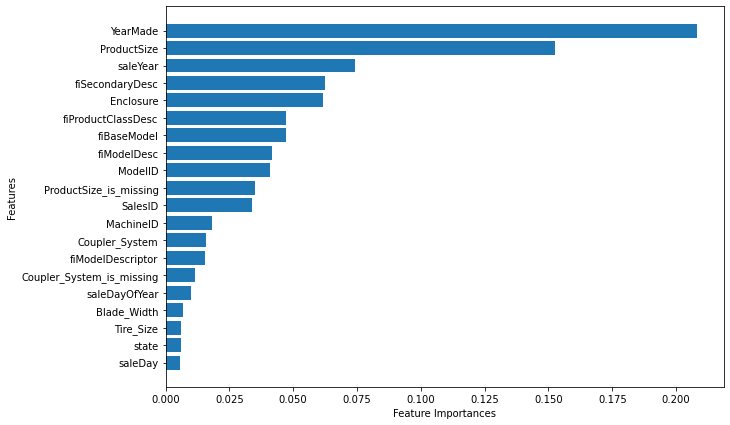

In [101]:
plot_features(X_train.columns, ideal_model.feature_importances_ )

In [104]:
df["ProductSize"].value_counts()

Medium            64342
Large / Medium    51297
Small             27057
Mini              25721
Large             21396
Compact            6280
Name: ProductSize, dtype: int64

## Why might knowing the feature importances of a trained machine learning model be helpful?
Need to try XGBoost and CatBoost